# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 评估与清理数据

在这一部分中我们将对original_data的DataFrame数据进行评估和清理。
主要包括两方面，结构和内容，即干净度和整洁度

数据的结构性问题指不符合“每个观察者为一行，每个变量为一列，每种类型的观察单位为一个表格”这三个问题，数据的内容问题为存在丢失数据，重复数据，无效数据等

为了区分开原始数据和处理过的数据，我们创建出新的变量‘cleaned_data’,让他为'original_data'复制出的副本，他们之后的清理步骤都将运用到'cleaned_data之中'

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
244,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,FEMALE
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE
38,Adelie,Dream,37.6,19.3,181.0,3300.0,FEMALE
132,Adelie,Dream,36.8,18.5,193.0,3500.0,FEMALE
139,Adelie,Dream,39.7,17.9,193.0,4250.0,MALE
242,Gentoo,Biscoe,46.5,14.5,213.0,4400.0,FEMALE
46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE
312,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,FEMALE
173,Chinstrap,Dream,48.5,17.5,191.0,3400.0,MALE
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,MALE


符合“每个观察者为一行，每个变量为一列，每种类型的观察单位为一个表格”,因此不存在结构性问题

### 数据干净度

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出结构来看`cleaned_data`总共有344条数据，其中`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`存在缺失值，将在后续进行评估和清理

类型选择上面`species`、`island`、`sex`,都是分类数据，因此可以吧他们的数据类型换成`Category`

In [6]:
cleaned_data["species"] = cleaned_data["species"].astype("category")
cleaned_data["island"] = cleaned_data["island"].astype("category")
cleaned_data["sex"] = cleaned_data["sex"].astype("category")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### 处理缺失数据

从`info`方法中可以看出culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g存在缺失值。
先提取出这些观察值得变量来进行查看

In [7]:
cleaned_data.query("culmen_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


可以看出3,339，两行除了种类和岛屿其他都是空值，所以为无效数据，将这两行删去

In [9]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [10]:
cleaned_data.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值。由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值，可以保留这些行。

#### 处理重复数据

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

#### 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [11]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [12]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [13]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

从以上输出来看，species和island列里并不存在不一致数据，但sex列里存在一个英文句号值，并不代表任何有效性别，我们应当把该值替换为NaN空值。

In [14]:
cleaned_data["sex"] = cleaned_data["sex"].replace(".", np.nan)

In [15]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### 处理无效或错误数据

In [16]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，cleaned_house_price里不存在脱离现实意义的数值。

## 探索数据

### 企鹅种类比例

In [19]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

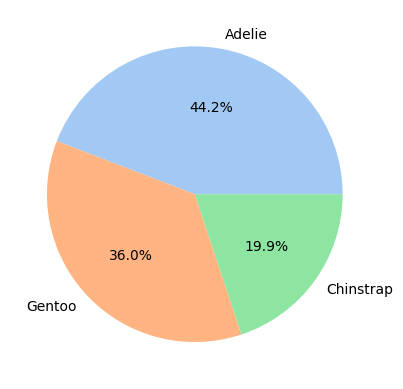

In [22]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.1f%%', labels=species_count.index)
plt.show()

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为1/5左右。

### 企鹅所属岛屿比例

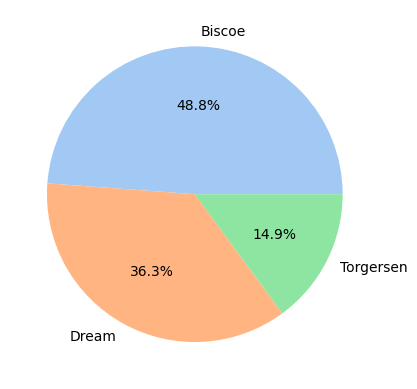

In [24]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct="%.1f%%", labels=island_count.index)
plt.show()

样本中一半左右的企鹅样本都来自`Biscoe`岛屿，占比最大，其次是`Dream`岛屿，来自`Torgersen`岛屿的样本最少。

### 企鹅性别比例

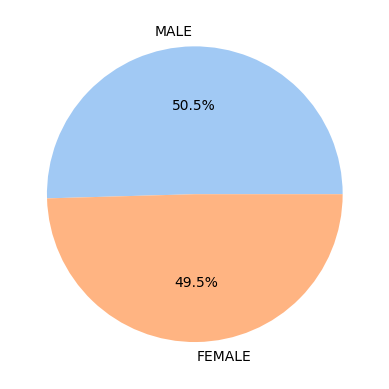

In [25]:
sex_count = cleaned_data["sex"].value_counts()
plt.pie(sex_count, autopct="%.1f%%", labels=sex_count.index)
plt.show()

样本企鹅的性别占比持平，符合随机抽样。

### 不同岛上的企鹅种类数量

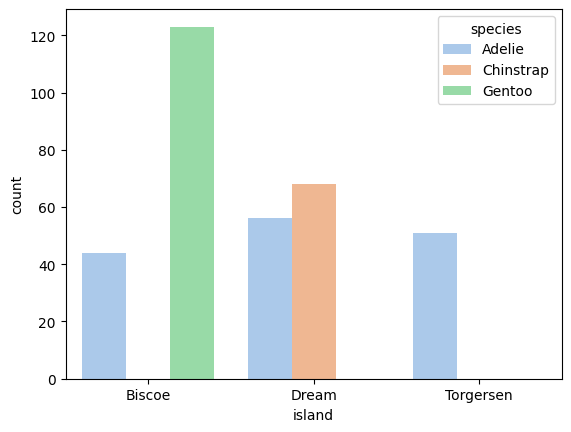

In [28]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

从以上可以看出，Adelie种类的企鹅样本在Biscoe、Dream、Torgersen这三个岛上都有，而Chinstrap种类只在Dream岛上才有，Gentoo只在Biscoe岛上才有。

### 不同岛屿上企鹅的性别数量

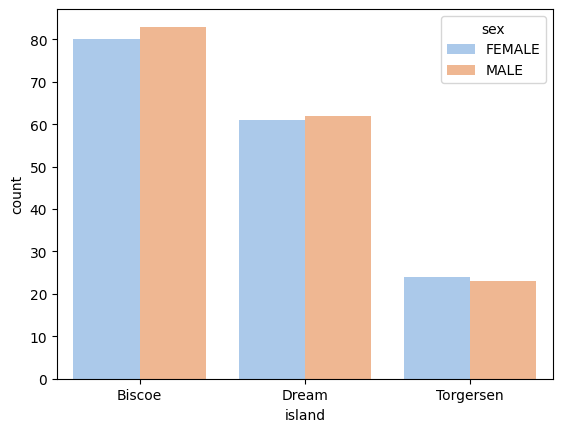

In [29]:
sns.countplot(cleaned_data, x="island", hue="sex")
plt.show()

### 查看数值之间的相关关系

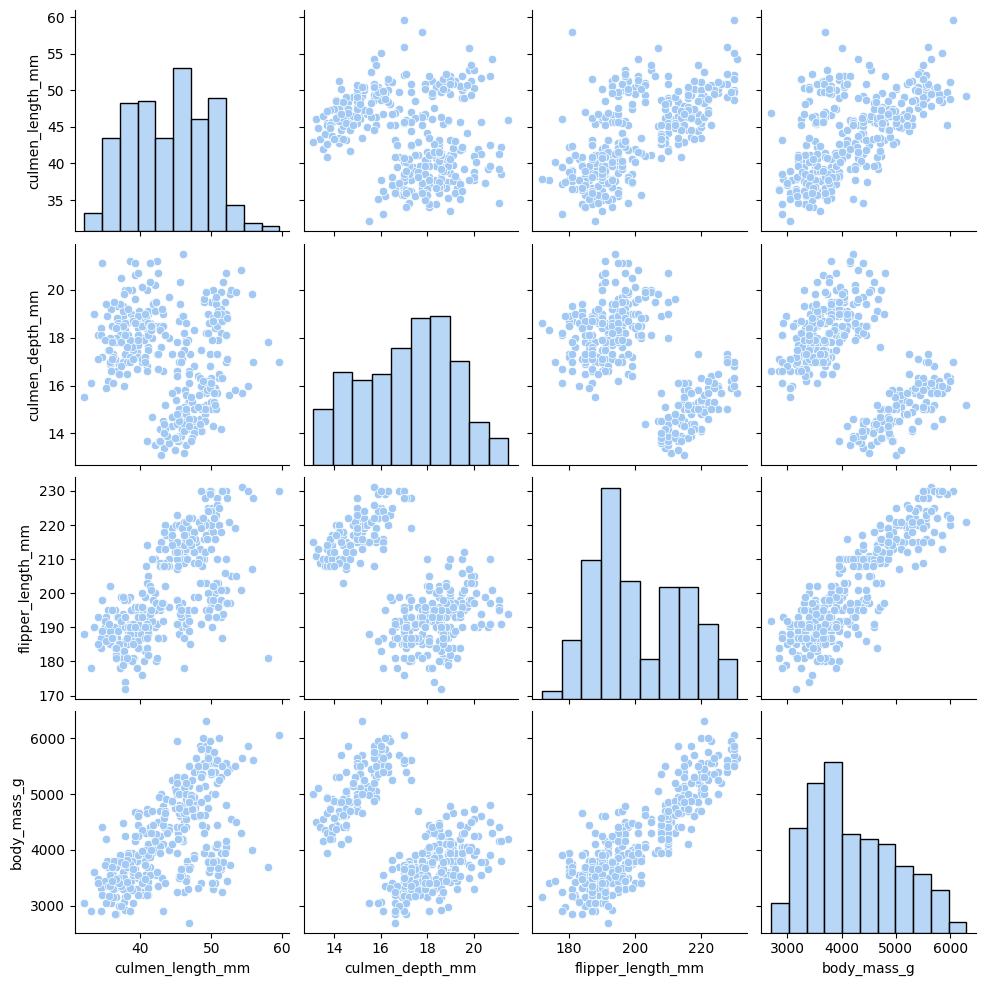

In [30]:
sns.pairplot(cleaned_data)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

### 根据种类查看数值之间的相关关系

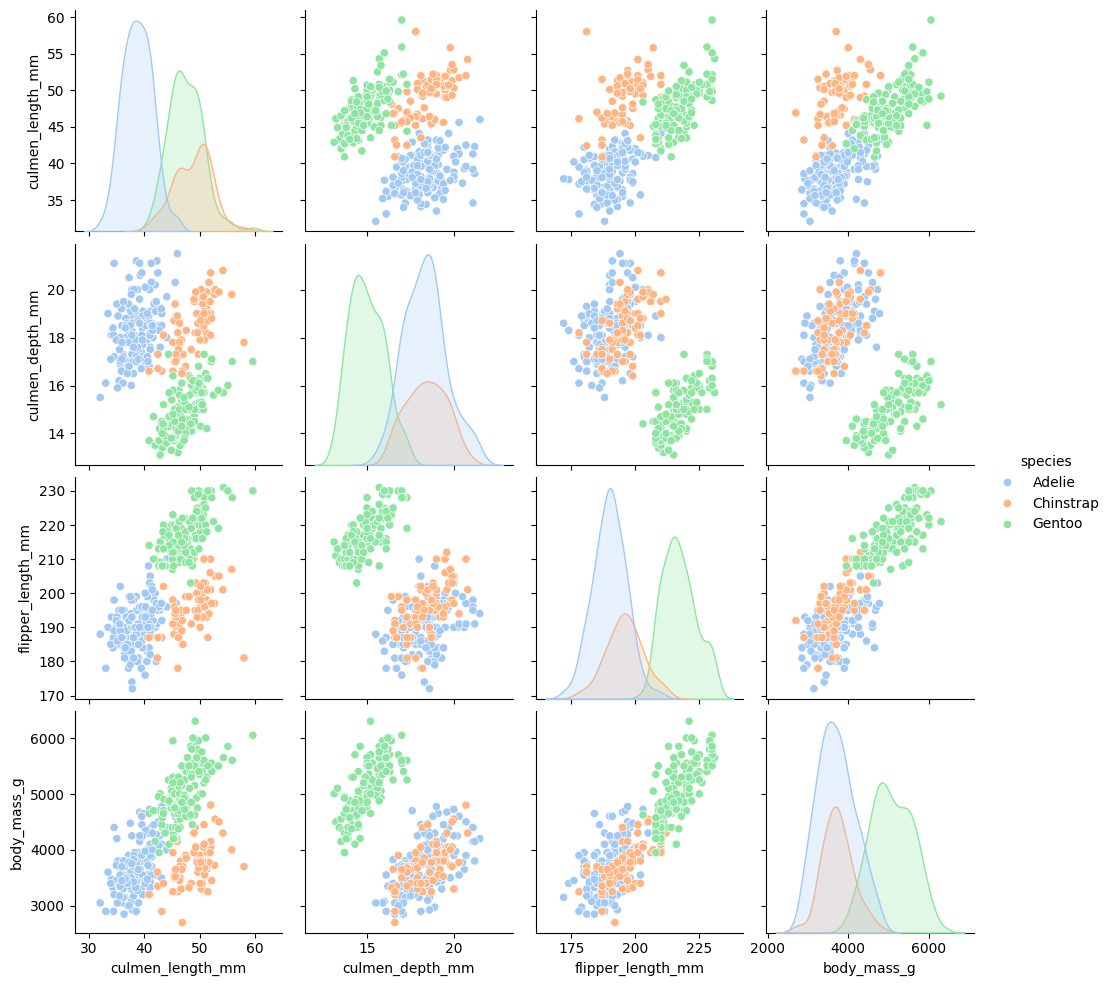

In [31]:
sns.pairplot(cleaned_data, hue="species")
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

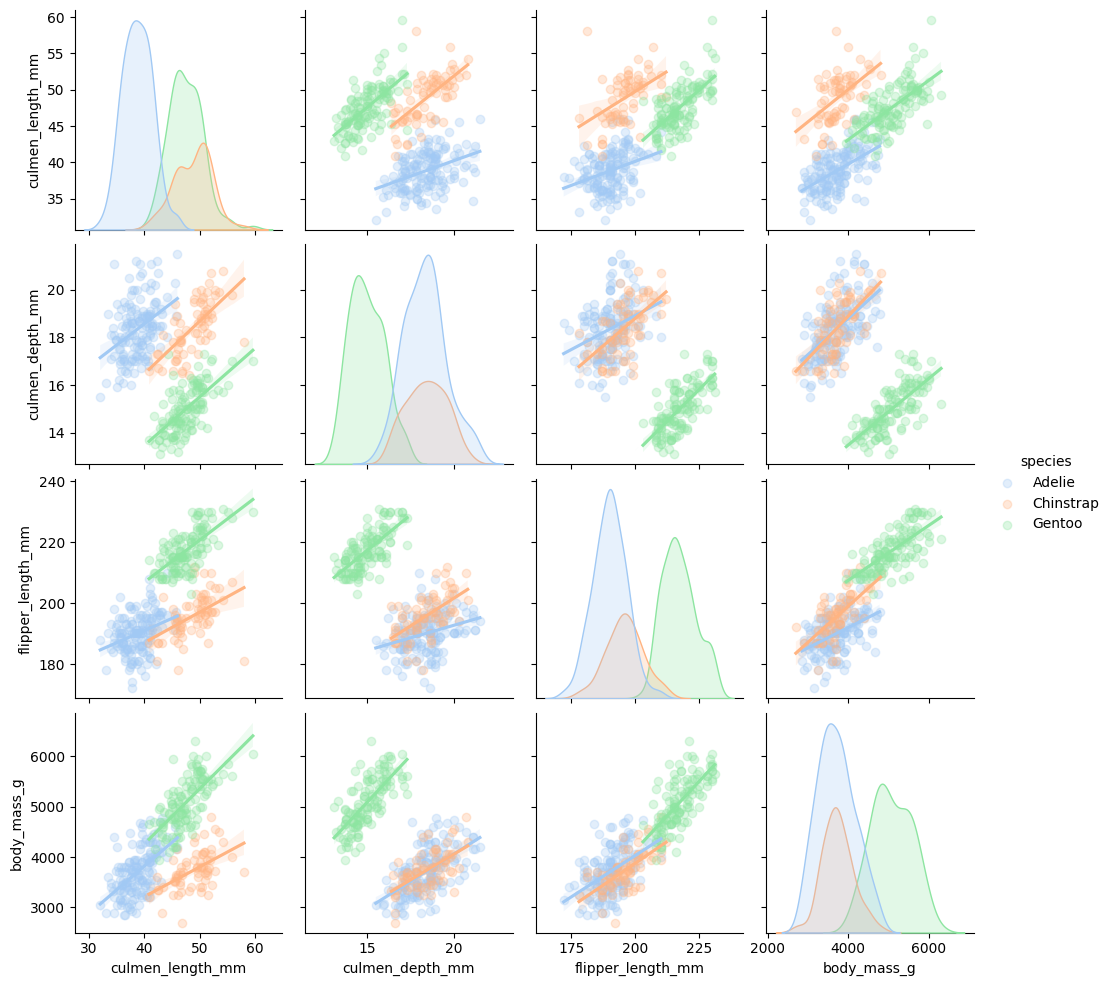

In [35]:
sns.pairplot(cleaned_data, hue="species", kind="reg", plot_kws={"scatter_kws": {"alpha": 0.3}})
plt.show()

### 根据性别查看数值之间的相关关系

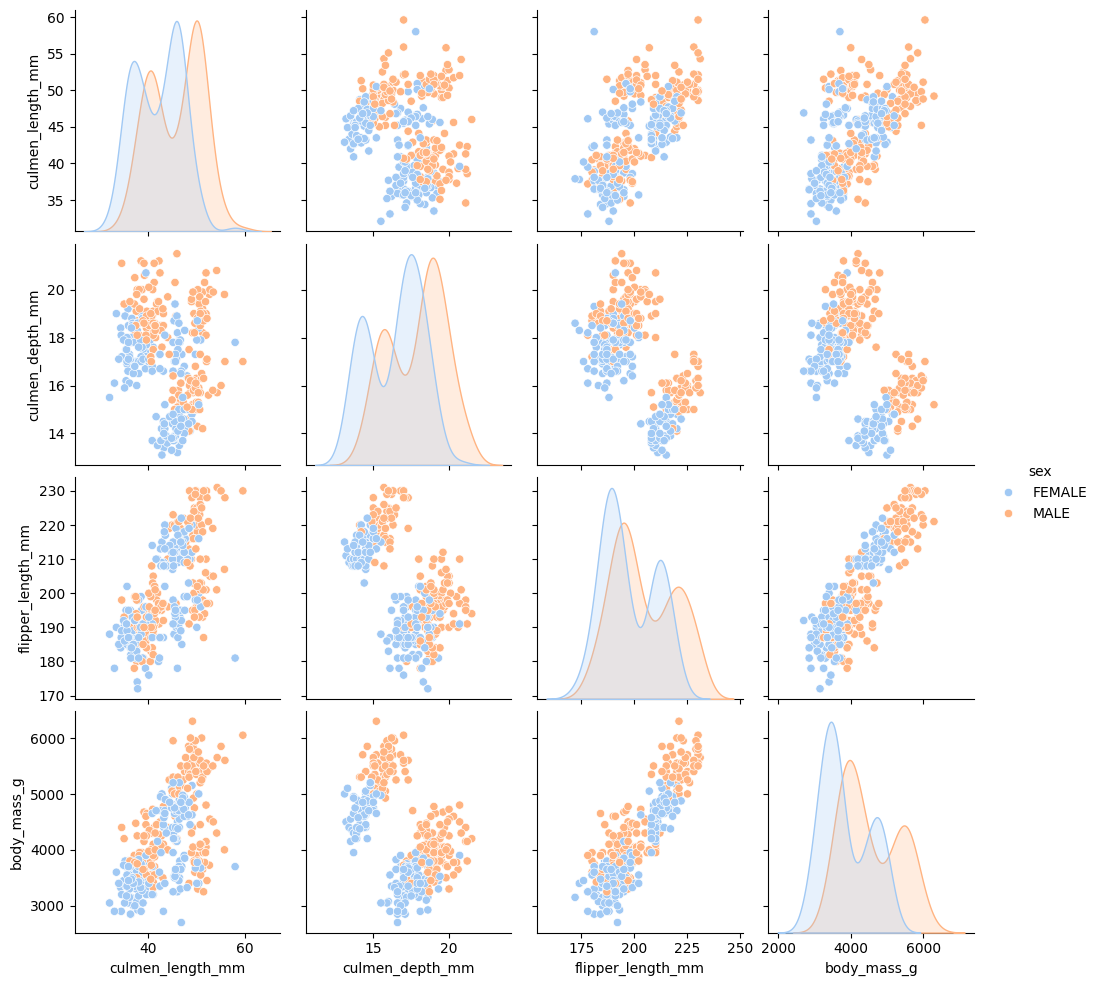

In [33]:
sns.pairplot(cleaned_data, hue="sex")
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。